# Customer Segmentation Using KMeans and PCA
This notebook performs customer segmentation based on online transaction data using clustering techniques.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

## Load Dataset
The dataset is loaded and filtered to remove missing values.

In [ ]:
df = pd.read_csv('Files/int_online_tx.csv')
df = df[df.CustomerID.notnull()]
df['CustomerID'] = df.CustomerID.astype(int)
df['Sales'] = df.Quantity * df.UnitPrice

## Feature Engineering
Features related to customer behavior are extracted.

In [5]:
invoice_data = df.groupby('CustomerID').agg(total_transactions=('InvoiceNo', 'nunique'))
product_data = df.groupby('CustomerID').agg(
    total_products=('StockCode', 'count'),
    total_unique_products=('StockCode', 'nunique')
)
sales_data = df.groupby('CustomerID').agg(total_sales=('Sales', 'sum'))
quantity_data = df.groupby('CustomerID').agg(total_quantity=('Quantity', 'sum'))

customer_df = pd.concat([invoice_data, product_data, sales_data, quantity_data], axis=1)

## Standardization
Standardize the data to normalize the feature scale.

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

## Dimensionality Reduction
PCA is applied to reduce dimensions to 2 components for visualization.

In [7]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

## Clustering
KMeans is used to cluster the customers into four segments.

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['cluster'] = kmeans.fit_predict(pca_data)

customer_df['PC1'] = pca_data[:, 0]
customer_df['PC2'] = pca_data[:, 1]

## Visualization
Visualize the PCA clustering, total sales, and customer count per cluster.

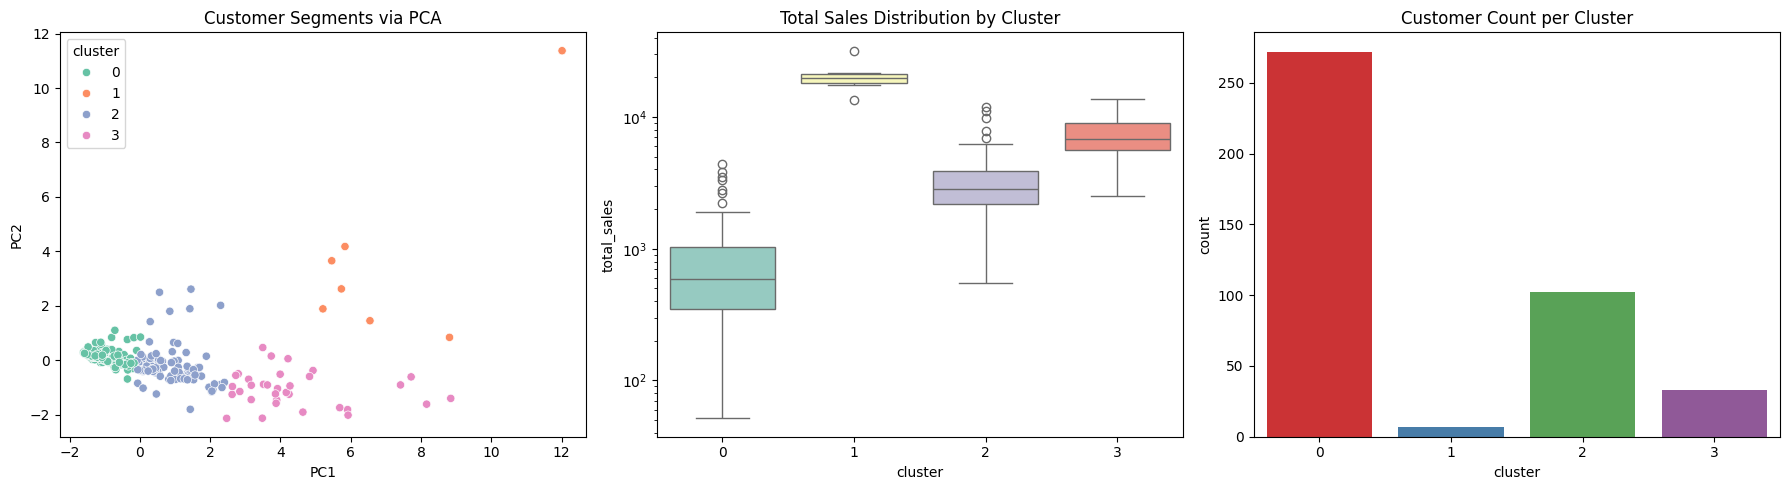

In [9]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=customer_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Customer Segments via PCA")

plt.subplot(1, 3, 2)
sns.boxplot(data=customer_df, x='cluster', y='total_sales', palette='Set3')
plt.title("Total Sales Distribution by Cluster")
plt.yscale('log')

plt.subplot(1, 3, 3)
sns.countplot(x='cluster', data=customer_df, palette='Set1')
plt.title("Customer Count per Cluster")

plt.tight_layout()
plt.show()

## Feature Correlation
Heatmap to show the correlation between different features.

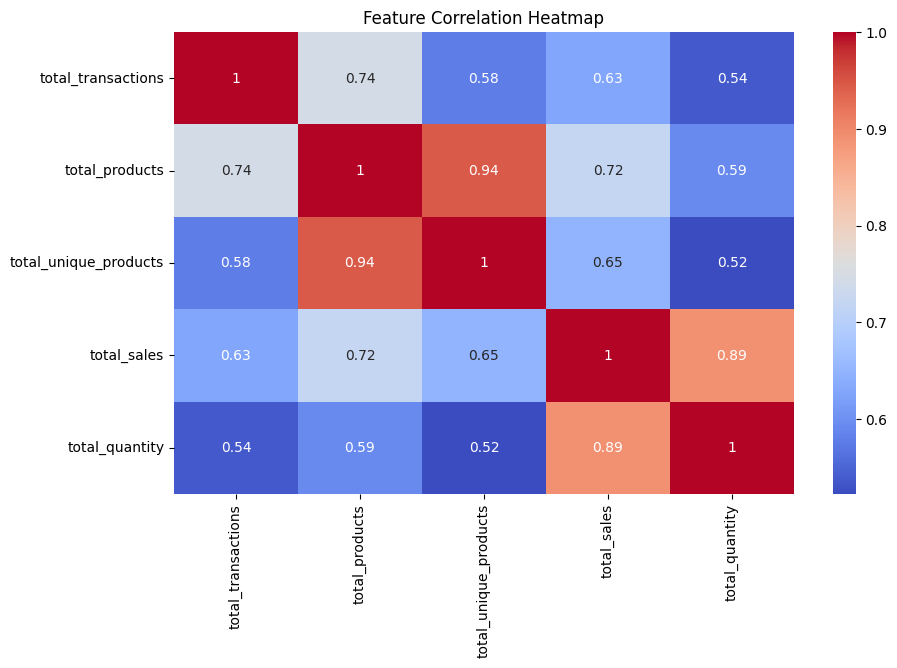

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(customer_df.drop(['cluster', 'PC1', 'PC2'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Final Dataset Preview
Display the final customer dataset with clusters and PCA components.

In [11]:
print(customer_df.head())

            total_transactions  total_products  total_unique_products  \
CustomerID                                                              
12347                        7             182                    103   
12348                        4              31                     22   
12349                        1              73                     73   
12350                        1              17                     17   
12352                        8              85                     59   

            total_sales  total_quantity  cluster       PC1       PC2  
CustomerID                                                            
12347           4310.00            2458        2  1.650874 -0.264903  
12348           1797.24            2341        0 -0.356386  0.761609  
12349           1757.55             631        0 -0.392141 -0.175094  
12350            334.40             197        0 -1.359430  0.187381  
12352           2506.04             536        2  0.331638 -0.